In [156]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")                      # 파일 저장 경로. 파일명 함께 지정.
    if not tarball_path.is_file():                                   # 아직 다운로드하지 않은 경우
        Path("datasets").mkdir(parents=True, exist_ok=True)          # 폴더 생성
        url = "https://github.com/ageron/data/raw/main/housing.tgz"  # 파일 다운로드
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:          # tgz 파일 압축 풀기
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))         # 압축 풀린 csv 파일 불러오기

In [158]:
np.set_printoptions(precision=4, suppress=True)

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))

import seaborn as sns
sns.set_theme()

In [160]:
X = load_housing_data()

X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [162]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [164]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [166]:
X.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [168]:
X.drop(["total_bedrooms"],axis=1, inplace=True)
X.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [170]:
X['mean_rooms']=(X.total_rooms/X.households).round(4)
X

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,mean_rooms
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.9841
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.2381
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.2881
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.8174
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.2819
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,INLAND,5.0455
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,INLAND,6.1140
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,INLAND,5.2055
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,INLAND,5.3295


In [172]:
X['family']=(X.population/X.households).round(4)
X

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,mean_rooms,family
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.9841,2.5556
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.2381,2.1098
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.2881,2.8023
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.8174,2.5479
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.2819,2.1815
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,INLAND,5.0455,2.5606
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,INLAND,6.1140,3.1228
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,INLAND,5.2055,2.3256
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,INLAND,5.3295,2.1232


In [174]:
X.drop(["total_rooms","households",'population'],axis=1,inplace=True)
X.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,mean_rooms,family
0,-122.23,37.88,41.0,8.3252,452600.0,NEAR BAY,6.9841,2.5556
1,-122.22,37.86,21.0,8.3014,358500.0,NEAR BAY,6.2381,2.1098
2,-122.24,37.85,52.0,7.2574,352100.0,NEAR BAY,8.2881,2.8023
3,-122.25,37.85,52.0,5.6431,341300.0,NEAR BAY,5.8174,2.5479
4,-122.25,37.85,52.0,3.8462,342200.0,NEAR BAY,6.2819,2.1815


In [176]:
X.drop(['longitude','latitude'],axis=1,inplace=True)
X.head()

,housing_median_age,median_income,median_house_value,ocean_proximity,mean_rooms,family
0,41.0,8.3252,452600.0,NEAR BAY,6.9841,2.5556
1,21.0,8.3014,358500.0,NEAR BAY,6.2381,2.1098
2,52.0,7.2574,352100.0,NEAR BAY,8.2881,2.8023
3,52.0,5.6431,341300.0,NEAR BAY,5.8174,2.5479
4,52.0,3.8462,342200.0,NEAR BAY,6.2819,2.1815


In [178]:
y=X.loc[:,'median_house_value']

In [180]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [182]:
X.describe()

,housing_median_age,median_income,median_house_value,mean_rooms,family
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,3.870671,206855.816909,5.429000,3.070655
std,12.585558,1.899822,115395.615874,2.474173,10.386049
min,1.000000,0.499900,14999.000000,0.846200,0.692300
25%,18.000000,2.563400,119600.000000,4.440675,2.429750
50%,29.000000,3.534800,179700.000000,5.229150,2.818100
75%,37.000000,4.743250,264725.000000,6.052400,3.282300
max,52.000000,15.000100,500001.000000,141.909100,1243.333300


In [184]:
num_features = X.describe().columns
corr_df = X[num_features].corr()
corr_df

,housing_median_age,median_income,median_house_value,mean_rooms,family
housing_median_age,1.000000,-0.119034,0.105623,-0.153277,0.013191
median_income,-0.119034,1.000000,0.688075,0.326895,0.018766
median_house_value,0.105623,0.688075,1.000000,0.151948,-0.023737
mean_rooms,-0.153277,0.326895,0.151948,1.000000,-0.004852
family,0.013191,0.018766,-0.023737,-0.004852,1.000000


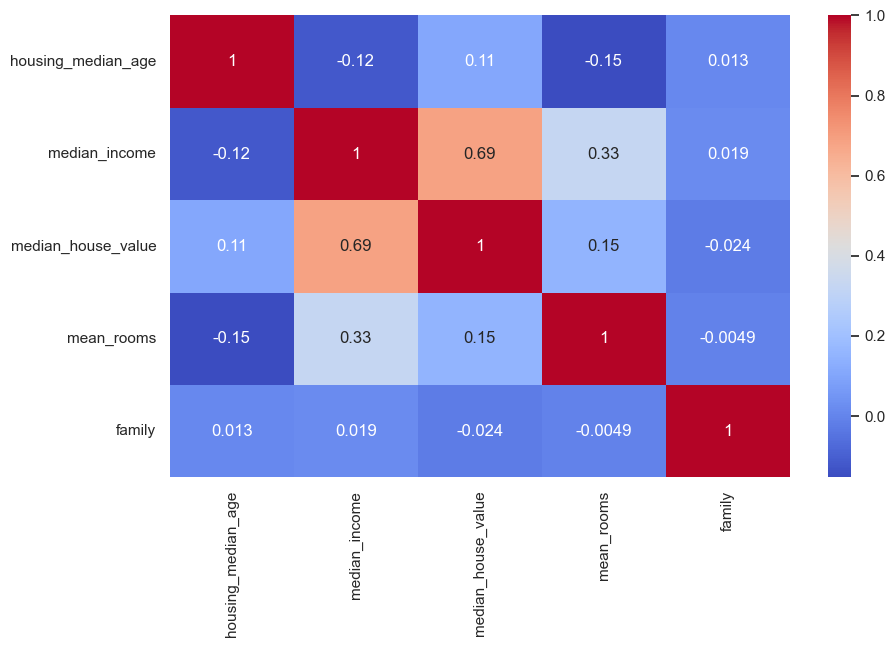

In [186]:
ax = sns.heatmap(corr_df, annot=True, cmap = "coolwarm")

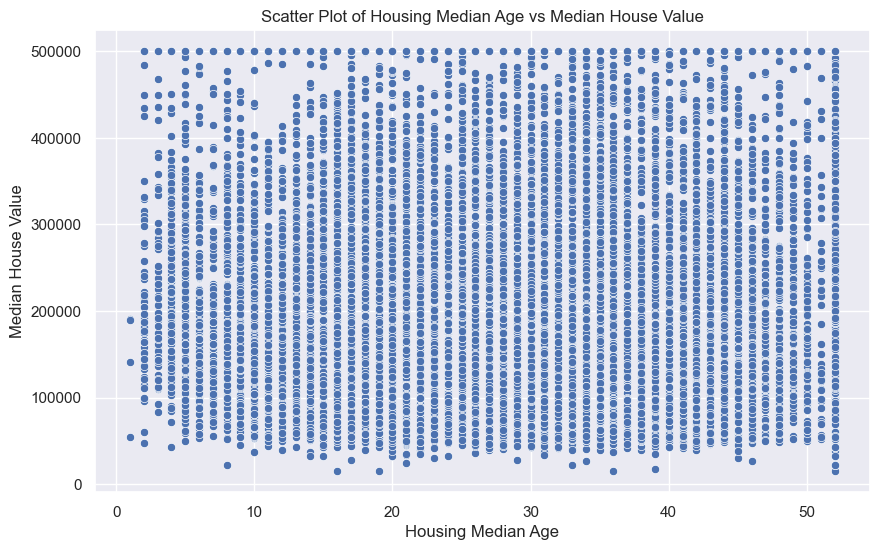

In [188]:
sns.scatterplot(x='housing_median_age', y='median_house_value', data=X)
plt.title('Scatter Plot of Housing Median Age vs Median House Value')
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.show()

In [190]:
X

,housing_median_age,median_income,median_house_value,ocean_proximity,mean_rooms,family
0,41.0,8.3252,452600.0,NEAR BAY,6.9841,2.5556
1,21.0,8.3014,358500.0,NEAR BAY,6.2381,2.1098
2,52.0,7.2574,352100.0,NEAR BAY,8.2881,2.8023
3,52.0,5.6431,341300.0,NEAR BAY,5.8174,2.5479
4,52.0,3.8462,342200.0,NEAR BAY,6.2819,2.1815
...,...,...,...,...,...,...
20635,25.0,1.5603,78100.0,INLAND,5.0455,2.5606
20636,18.0,2.5568,77100.0,INLAND,6.1140,3.1228
20637,17.0,1.7000,92300.0,INLAND,5.2055,2.3256
20638,18.0,1.8672,84700.0,INLAND,5.3295,2.1232


In [192]:
mean_mhv=X['median_house_value'].mean()
mean_mhv

206855.81690891474

In [194]:
X['compare_mhv']= X['median_house_value'] >= mean_mhv
X

,housing_median_age,median_income,median_house_value,ocean_proximity,mean_rooms,family,compare_mhv
0,41.0,8.3252,452600.0,NEAR BAY,6.9841,2.5556,True
1,21.0,8.3014,358500.0,NEAR BAY,6.2381,2.1098,True
2,52.0,7.2574,352100.0,NEAR BAY,8.2881,2.8023,True
3,52.0,5.6431,341300.0,NEAR BAY,5.8174,2.5479,True
4,52.0,3.8462,342200.0,NEAR BAY,6.2819,2.1815,True
...,...,...,...,...,...,...,...
20635,25.0,1.5603,78100.0,INLAND,5.0455,2.5606,False
20636,18.0,2.5568,77100.0,INLAND,6.1140,3.1228,False
20637,17.0,1.7000,92300.0,INLAND,5.2055,2.3256,False
20638,18.0,1.8672,84700.0,INLAND,5.3295,2.1232,False


In [ ]:
#housing_median_age 의 range 별로 compare_mhv를 넘는 비율 구하기